In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import matplotlib.pyplot as plt



In [2]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')
train = pd.concat([train_x, train_y], axis = 1)

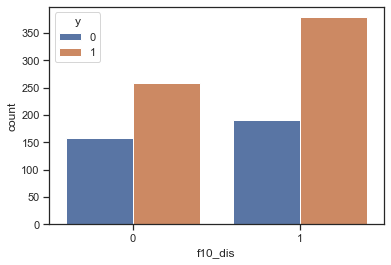

In [3]:
sns.set(style="ticks", color_codes=True)
save = train[train['f10']!=899.1]
# sns.countplot(hue = 'y', x = 'f10', data = save)
discretized = pd.qcut(save['f10'],
                            q=[0,.4, 1],
                            labels=False,
                            precision=0)
save.insert(save.columns.get_loc('f10'), "f10_dis", discretized)
sns.countplot(hue = 'y', x = 'f10_dis', data = save)

In [4]:
def f10(df):
    b = df[df['f10']!=899.1].quantile(0.4)['f10']
    dis = pd.cut(df['f10'], bins=[-99999, b, 899, 999999], labels=[0, 1,2])
    df['f10'] = dis
    return df

In [5]:
def catagorize(df):
    catags = []
    for col in list(df.columns):
        if(type(df[col][0])==str):
            catags.append(col)
    cols = list(df.columns)
    quant = [i for i in cols if i not in catags]
    return (catags, quant)

def encoder(df):
    catags = catagorize(df)[0]
    temp = df.copy()
    enc = preprocessing.LabelEncoder()
    
    for col in catags:
        temp[col] = enc.fit_transform(temp[col])
    return temp

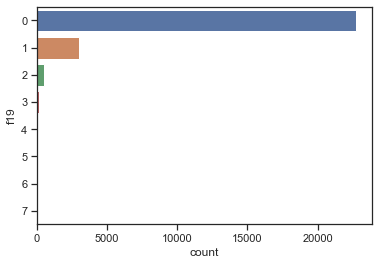

In [6]:
sns.set(style="ticks", color_codes=True)

sns.countplot(y='f19', data=train)


In [7]:
def remove_unknown(df):
    remove_cand = [('f1', 'c11'),  ('f7', 'c2')]
    remove = [('f3', 'c1'), ('f4', 'c4'), ('f9', 'c3'), ('f11', 5176.3), ('f15', 0.2)]
    for r in remove:
        df = df[df[r[0]] != r[1]]
    df = df[df['f19'] < 4]
    return df

In [8]:
f10(train)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,y
0,c11,c0,c0,c7,53,1,c0,c3,c2,2,...,c1,65.7426,-34.16,1.4,2.9772,c1,343,0,c6,0
1,c5,c1,c2,c0,48,17,c1,c0,c1,2,...,c1,65.7426,-34.16,1.4,2.9772,c1,27,0,c6,0
2,c0,c0,c0,c6,29,1,c0,c2,c2,2,...,c0,65.0251,-36.96,-1.8,0.8004,c0,401,1,c4,0
3,c1,c0,c0,c2,25,2,c1,c3,c2,2,...,c1,65.7426,-34.16,1.4,2.9772,c1,212,0,c6,0
4,c6,c0,c0,c6,40,3,c0,c0,c2,2,...,c1,65.1525,-37.68,-1.8,0.8430,c1,379,0,c3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,c1,c1,c0,c0,28,1,c0,c4,c0,2,...,c0,65.7426,-34.16,1.4,2.9754,c1,327,0,c6,0
26356,c9,c1,c2,c2,31,9,c0,c0,c1,2,...,c1,65.7958,-29.12,1.1,2.9148,c1,179,0,c4,0
26357,c4,c1,c2,c3,33,1,c0,c2,c1,2,...,c1,65.7958,-29.12,1.1,2.9148,c1,641,0,c4,0
26358,c9,c0,c0,c7,53,6,c0,c0,c0,2,...,c1,65.0251,-36.96,-1.8,0.7464,c1,35,0,c4,0


In [9]:
train = encoder(train)

In [10]:
train = remove_unknown(train)

/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
train = train.apply(pd.to_numeric)
# train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

In [12]:
train.isnull().sum()

f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
y      0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26302 entries, 0 to 26359
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      26302 non-null  int64  
 1   f2      26302 non-null  int64  
 2   f3      26302 non-null  int64  
 3   f4      26302 non-null  int64  
 4   f5      26302 non-null  int64  
 5   f6      26302 non-null  int64  
 6   f7      26302 non-null  int64  
 7   f8      26302 non-null  int64  
 8   f9      26302 non-null  int64  
 9   f10     26302 non-null  int64  
 10  f11     26302 non-null  float64
 11  f12     26302 non-null  int64  
 12  f13     26302 non-null  float64
 13  f14     26302 non-null  float64
 14  f15     26302 non-null  float64
 15  f16     26302 non-null  float64
 16  f17     26302 non-null  int64  
 17  f18     26302 non-null  int64  
 18  f19     26302 non-null  int64  
 19  f20     26302 non-null  int64  
 20  y       26302 non-null  int64  
dtypes: float64(5), int64(16)
memory usa

In [14]:
(_, quant) = catagorize(train)
print(train.shape)
from scipy import stats
for x in quant:
    train = train[np.abs(train[x]-train[x].mean()) <= (3*train[x].std())]
print(train.shape)

(26302, 21)
(21222, 21)


In [15]:
train.loc[train['y'] == 0]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,y
0,3,0,0,7,53,1,0,3,2,2,...,1,65.7426,-34.16,1.4,2.9772,1,343,0,6,0
2,0,0,0,6,29,1,0,2,2,2,...,0,65.0251,-36.96,-1.8,0.8004,0,401,1,4,0
3,1,0,0,2,25,2,1,3,2,2,...,1,65.7426,-34.16,1.4,2.9772,1,212,0,6,0
4,8,0,0,6,40,3,0,0,2,2,...,1,65.1525,-37.68,-1.8,0.8430,1,379,0,3,0
5,9,1,2,2,28,1,0,4,2,2,...,0,65.7958,-29.12,1.1,2.9130,1,646,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,1,1,0,0,28,1,0,4,0,2,...,0,65.7426,-34.16,1.4,2.9754,1,327,0,6,0
26356,11,1,2,2,31,9,0,0,1,2,...,1,65.7958,-29.12,1.1,2.9148,1,179,0,4,0
26357,6,1,2,3,33,1,0,2,1,2,...,1,65.7958,-29.12,1.1,2.9148,1,641,0,4,0
26358,11,0,0,7,53,6,0,0,0,2,...,1,65.0251,-36.96,-1.8,0.7464,1,35,0,4,0


In [16]:
y = train.y
X = train.drop('y', axis =1)


In [17]:
import statsmodels.api as sm
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


ValueError: Length of passed values is 19, index implies 20.

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
y = train.y
X = train.drop('y', axis =1)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [ ]:
y = train['y'].values
X = train.drop('y', axis=1)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()
# feat_importances.get_figure.savefig("feature.png")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
backward_elmin = ['f2', 'f3','f10', 'f11', 'f13', 'f15', 'f16', 'f17', 'f18', 'f19']
decision_tree = [18, 16, 5, 6, 1, 4, 11, 8, 10, 9, 12 , 17, 15]
lasso = ['f14', 'f20',  'f18', 'f11']
input_col = ["f"+str(i) for i in decision_tree]

y = train['y'].values
X = train[input_col]

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.fit_transform(X)
pca = PCA(n_components=len(input_col))
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
cnt = 1
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=len(input_col))
    cv_results = model_selection.cross_val_score(model, X_train, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}/{}\t{}: {}".format(cnt, len(models), name, cv_results.mean())
    cnt+=1;
    print(msg)


In [ ]:

val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')

f10(val_x)
val_x = encoder(val_x)
val_x = val_x.apply(pd.to_numeric)
val_x[(np.abs(stats.zscore(val_x)) < 3).all(axis=1)]

scaler.fit(val_x)
val_x = scaler.fit_transform(val_x)
pca.fit(val_x)
val_x = pca.fit_transform(val_x)
svc = SVC()
svc.fit(X_train, y)
predictions = svc.predict(val_x)
print("Accuracy : ", accuracy_score(val_y, predictions))
print("Confusion Matrix : \n",confusion_matrix(val_y, predictions))
print("Classification Report: \n",classification_report(val_y, predictions))

In [ ]:
def underSampling (data_df):

    print ("Inside Undersampling")
    # Lets shuffle the data before creating the subsamples
    data_df.sample(frac=1)
    # count the number of records having personal loan as 1 from the dataframe 
    count = data_df[data_df["y"] == 1]["y"].count()
    # match and select same number of records for both the targets.
    outcome_True_df     = data_df.loc[data_df['y'] == 1]
    outcome_False_df    = data_df.loc[data_df['y'] == 0][:count]
    #merge the classes with equal number of records
    normal_distributed_df = pd.concat([outcome_True_df, outcome_False_df])
    # Shuffle dataframe rows
    balanced_df = normal_distributed_df.sample(frac=1, random_state=42)
    return balanced_df

def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        metrics.confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    metrics.accuracy_score(y_test,y_pred)*100) 
    
    print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
      
    print("Report : ", 
    metrics.classification_report(y_test, y_pred))
    
    
def splitdataset(data_df, label, t_size):
         # Seperating the target variable
    data_df.head()
    Y = data_df[label]
    data_df.drop(label,axis=1,inplace=True)
    X = data_df
    #print ("inside split data set", Y.unique())  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = t_size, random_state = 100) 
    #print ("inside split data set###")    
    return X, Y, X_train, X_test, y_train, y_test

train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')

new_df = bank_df[input_col].copy()
label = "Target"
# undersample the train data
new_df = underSampling(new_df)
t_size = 0.3 #Set the split ratio to 70:30
# split the data set
X, Y, X_train, X_test, y_train, y_test = splitdataset(new_df,label,t_size)

# Try with polynomial features (1)
poly_features_1 = PolynomialFeatures(degree=1)


X_train_poly1 = poly_features_1.fit_transform(X_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_pred = logisticRegr.predict(poly_features_1.fit_transform(X_test))
cal_accuracy(y_test, y_test_pred)
